Kích thước dữ liệu: (1000, 8)

Thông tin cơ bản về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None


5 dòng đầu tiên của dữ liệu:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Thống kê mô tả cho các biến số:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Thống kê mô tả cho các biến phân loại:

gender:


gender
female    518
male      482
Name: count, dtype: int64


race/ethnicity:


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


parental level of education:


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


lunch:


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course:


test preparation course
none         642
completed    358
Name: count, dtype: int64


Kiểm tra giá trị thiếu:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

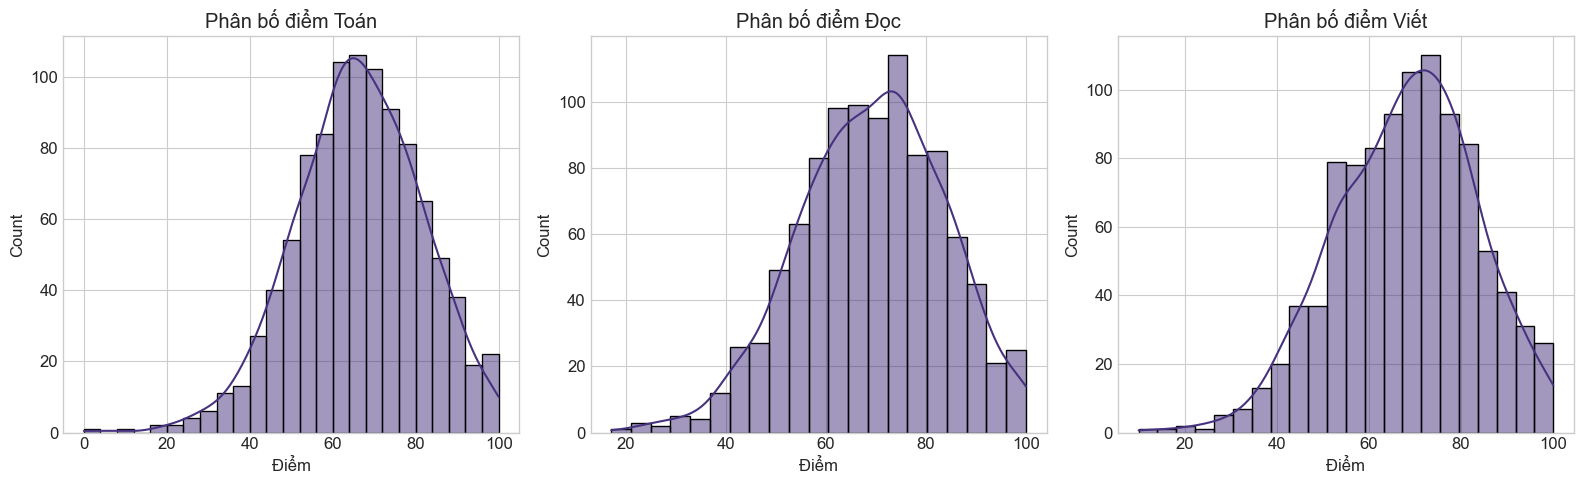

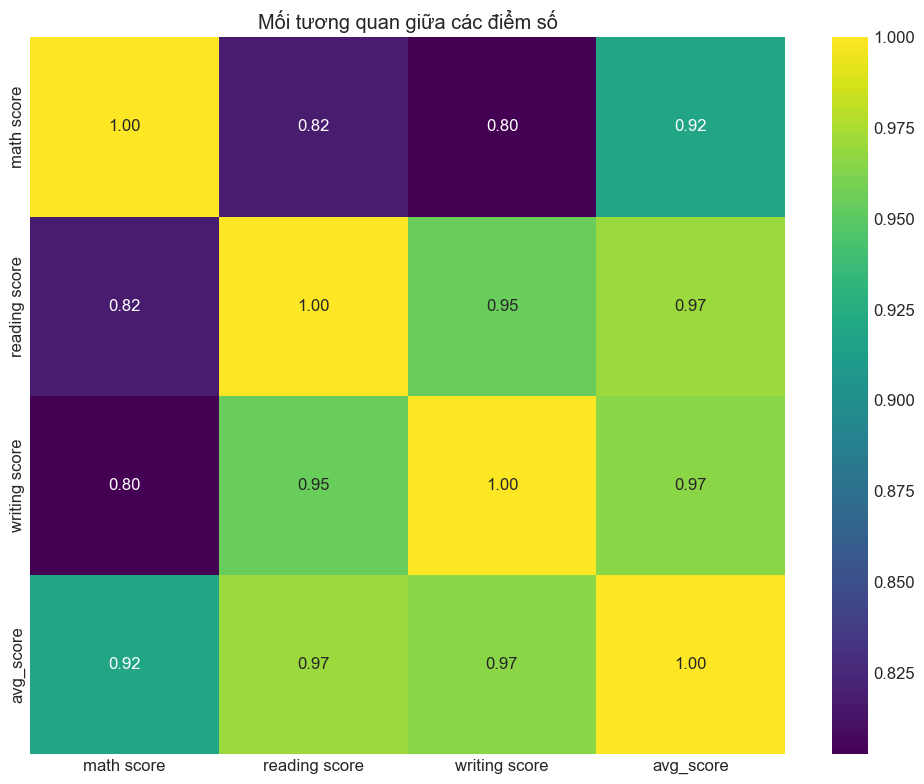

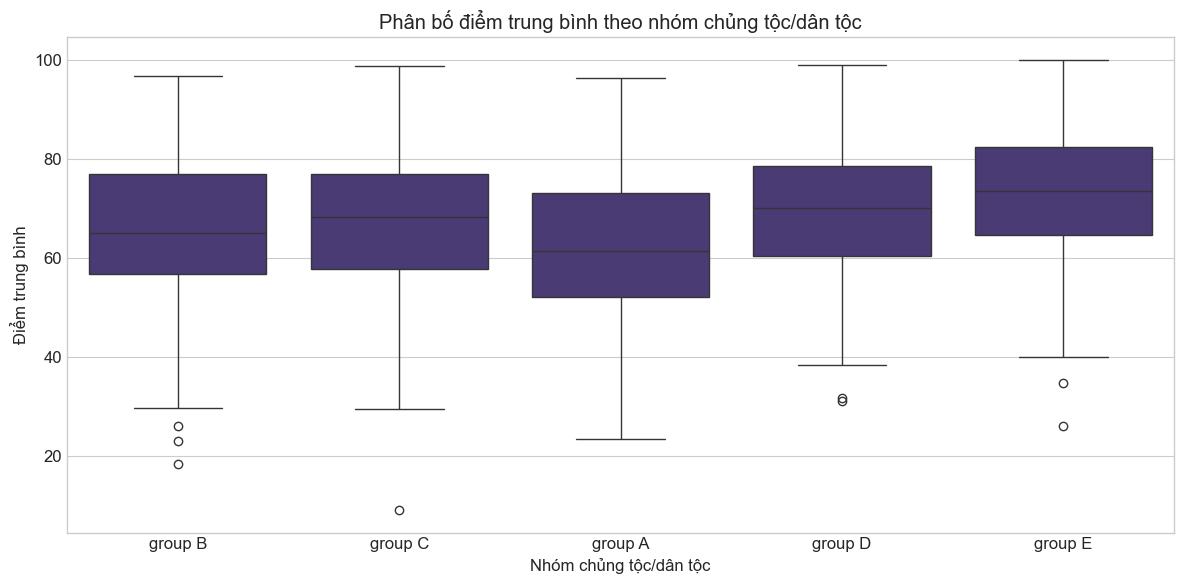

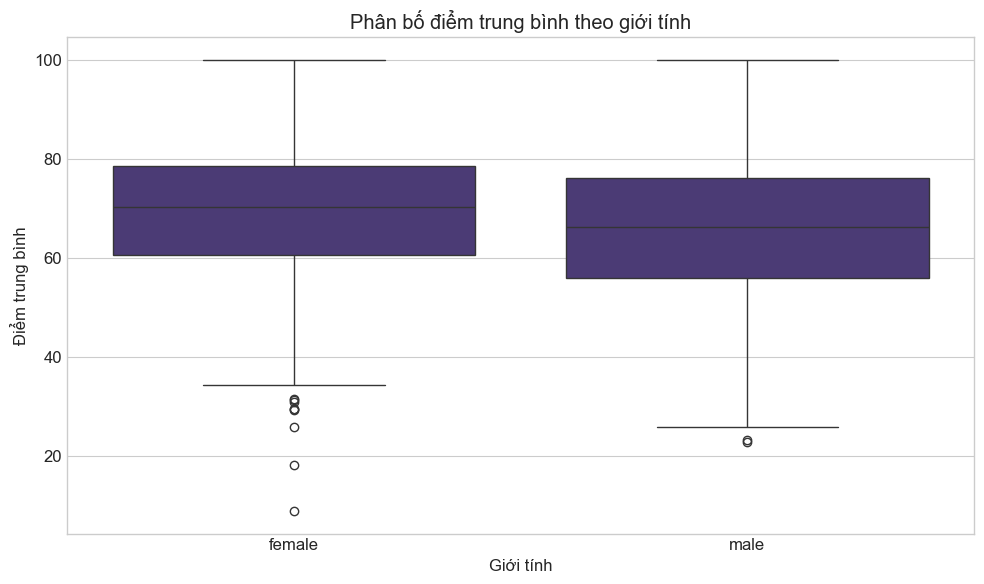

In [1]:
# Phân tích dữ liệu điểm thi của học sinh

## Cài đặt các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Cấu hình biểu đồ đẹp hơn
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu
# Đọc dữ liệu từ file CSV
df = pd.read_csv('./datasets/student_performance/student_performance.csv')

# Hiển thị thông tin cơ bản về bộ dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")
print("\nThông tin cơ bản về các cột:")
display(df.info())

print("\n5 dòng đầu tiên của dữ liệu:")
display(df.head())

## Phân tích thống kê mô tả
# Thống kê mô tả cho các biến số
print("\nThống kê mô tả cho các biến số:")
display(df.describe())

# Thống kê mô tả cho các biến phân loại
print("\nThống kê mô tả cho các biến phân loại:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts())

## Kiểm tra giá trị thiếu
# Kiểm tra giá trị thiếu trong dữ liệu
print("\nKiểm tra giá trị thiếu:")
display(df.isnull().sum())

## Khám phá dữ liệu ban đầu

# Thêm cột điểm trung bình của 3 môn
df['avg_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Phân bố điểm số theo từng môn
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Phân bố điểm Toán')
plt.xlabel('Điểm')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Phân bố điểm Đọc')
plt.xlabel('Điểm')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Phân bố điểm Viết')
plt.xlabel('Điểm')

plt.tight_layout()
plt.show()

# Mối tương quan giữa các biến số
plt.figure(figsize=(10, 8))
correlation_matrix = df[['math score', 'reading score', 'writing score', 'avg_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mối tương quan giữa các điểm số')
plt.tight_layout()
plt.show()

# Biểu đồ phân bố điểm trung bình theo nhóm chủng tộc/dân tộc
plt.figure(figsize=(12, 6))
sns.boxplot(x='race/ethnicity', y='avg_score', data=df)
plt.title('Phân bố điểm trung bình theo nhóm chủng tộc/dân tộc')
plt.xlabel('Nhóm chủng tộc/dân tộc')
plt.ylabel('Điểm trung bình')
plt.tight_layout()
plt.show()

# Biểu đồ phân bố điểm trung bình theo giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='avg_score', data=df)
plt.title('Phân bố điểm trung bình theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Điểm trung bình')
plt.tight_layout()
plt.show()



In [2]:
## Task 1: In ra index của 10 học sinh có math score và reading score đều nằm trong Top 100
print("\n## Task 1: 10 học sinh có math score và reading score đều nằm trong Top 100")

# Lấy top 100 học sinh có điểm toán cao nhất
top_100_math = df.nlargest(100, 'math score').index.tolist()

# Lấy top 100 học sinh có điểm đọc cao nhất
top_100_reading = df.nlargest(100, 'reading score').index.tolist()

# Tìm giao của hai danh sách trên
common_top_100 = list(set(top_100_math) & set(top_100_reading))

# Lấy thông tin chi tiết của 10 học sinh đầu tiên
top_10_common = common_top_100[:10]
display(df.loc[top_10_common, ['gender', 'race/ethnicity', 'math score', 'reading score', 'writing score', 'avg_score']])

print(f"\nĐã tìm thấy {len(common_top_100)} học sinh có cả điểm toán và điểm đọc đều nằm trong top 100.")
print(f"10 học sinh đầu tiên có index là: {top_10_common}")




## Task 1: 10 học sinh có math score và reading score đều nằm trong Top 100


,gender,race/ethnicity,math score,reading score,writing score,avg_score
509,female,group C,86,92,87,88.333333
2,female,group B,90,95,93,92.666667
6,female,group B,88,95,92,91.666667
263,female,group E,99,93,90,94.000000
903,female,group D,93,100,100,97.666667
268,female,group D,88,92,95,91.666667
16,male,group C,88,89,86,87.666667
403,female,group D,88,99,100,95.666667
916,male,group E,100,100,100,100.000000
149,male,group E,100,100,93,97.666667



Đã tìm thấy 52 học sinh có cả điểm toán và điểm đọc đều nằm trong top 100.
10 học sinh đầu tiên có index là: [509, 2, 6, 263, 903, 268, 16, 403, 916, 149]



## Task 2: 20 học sinh có điểm writing score cao nhất của mỗi group (race/ethnicity)

Top 20 học sinh có điểm writing cao nhất của nhóm group B:


,gender,race/ethnicity,writing score,avg_score
855,female,group B,96,96.666667
514,female,group B,94,89.333333
2,female,group B,93,92.666667
6,female,group B,92,91.666667
94,female,group B,92,85.666667
121,male,group B,92,90.666667
501,female,group B,92,91.000000
474,female,group B,91,90.333333
919,male,group B,91,92.666667
577,female,group B,89,87.000000


Index: [855, 514, 2, 6, 94, 121, 501, 474, 919, 577, 833, 551, 722, 158, 667, 715, 803, 815, 125, 749]

Top 20 học sinh có điểm writing cao nhất của nhóm group C:


,gender,race/ethnicity,writing score,avg_score
165,female,group C,100,98.666667
594,female,group C,99,97.000000
717,female,group C,99,97.000000
334,female,group C,95,90.333333
347,female,group C,95,88.666667
381,male,group C,95,94.000000
397,female,group C,95,89.666667
229,female,group C,94,92.333333
325,female,group C,94,88.666667
732,female,group C,94,90.000000


Index: [165, 594, 717, 334, 347, 381, 397, 229, 325, 732, 979, 122, 276, 420, 562, 463, 465, 612, 864, 104]

Top 20 học sinh có điểm writing cao nhất của nhóm group A:


,gender,race/ethnicity,writing score,avg_score
546,female,group A,97,96.333333
614,female,group A,93,89.333333
571,male,group A,92,93.000000
820,female,group A,92,89.000000
983,female,group A,91,85.333333
702,male,group A,87,86.000000
539,male,group A,86,91.666667
623,male,group A,86,94.000000
468,female,group A,85,83.333333
489,male,group A,82,81.000000


Index: [546, 614, 571, 820, 983, 702, 539, 623, 468, 489, 778, 911, 77, 300, 423, 837, 378, 490, 651, 170]

Top 20 học sinh có điểm writing cao nhất của nhóm group D:


,gender,race/ethnicity,writing score,avg_score
106,female,group D,100,95.666667
179,female,group D,100,99.000000
377,female,group D,100,93.333333
403,female,group D,100,95.666667
903,female,group D,100,97.666667
957,female,group D,100,97.333333
970,female,group D,100,96.333333
625,male,group D,99,98.666667
712,female,group D,99,99.000000
110,female,group D,98,88.000000


Index: [106, 179, 377, 403, 903, 957, 970, 625, 712, 110, 652, 373, 580, 941, 268, 821, 316, 907, 604, 641]

Top 20 học sinh có điểm writing cao nhất của nhóm group E:


,gender,race/ethnicity,writing score,avg_score
114,female,group E,100,99.666667
458,female,group E,100,100.000000
566,female,group E,100,97.333333
685,female,group E,100,97.666667
916,male,group E,100,100.000000
962,female,group E,100,100.000000
451,female,group E,97,96.333333
802,female,group E,95,92.000000
886,female,group E,95,96.000000
995,female,group E,95,94.000000


Index: [114, 458, 566, 685, 916, 962, 451, 802, 886, 995, 533, 149, 852, 503, 755, 164, 890, 263, 216, 286]


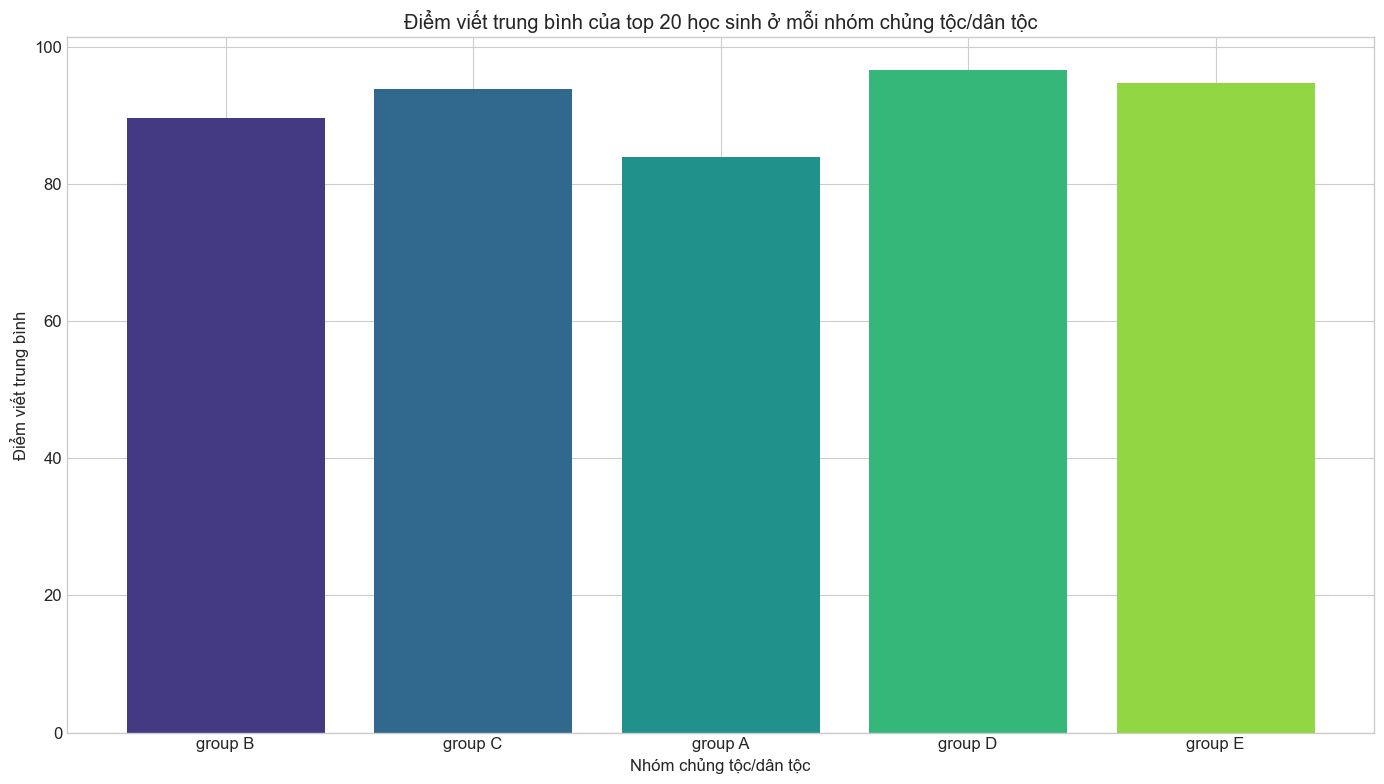

In [3]:
## Task 2: In ra index của 20 học sinh có điểm writing score cao nhất của mỗi group (race/ethnicity)
print("\n## Task 2: 20 học sinh có điểm writing score cao nhất của mỗi group (race/ethnicity)")

# Lấy danh sách các nhóm chủng tộc/dân tộc
race_groups = df['race/ethnicity'].unique()

# Tạo dictionary để lưu kết quả
top_writing_by_race = {}

# Tìm top 20 học sinh có điểm viết cao nhất của mỗi nhóm
for race in race_groups:
    race_df = df[df['race/ethnicity'] == race]
    top_20_indices = race_df.nlargest(20, 'writing score').index.tolist()
    top_writing_by_race[race] = top_20_indices
    
    print(f"\nTop 20 học sinh có điểm writing cao nhất của nhóm {race}:")
    display(df.loc[top_20_indices, ['gender', 'race/ethnicity', 'writing score', 'avg_score']])
    print(f"Index: {top_20_indices}")

# Vẽ biểu đồ so sánh điểm viết cao nhất giữa các nhóm
plt.figure(figsize=(14, 8))
race_top_scores = {}

for race in race_groups:
    race_top_scores[race] = df.loc[top_writing_by_race[race], 'writing score'].mean()

races = list(race_top_scores.keys())
scores = list(race_top_scores.values())

plt.bar(races, scores, color=sns.color_palette("viridis", len(races)))
plt.title('Điểm viết trung bình của top 20 học sinh ở mỗi nhóm chủng tộc/dân tộc')
plt.xlabel('Nhóm chủng tộc/dân tộc')
plt.ylabel('Điểm viết trung bình')
plt.tight_layout()
plt.show()




## Task 3: Thống kê số lượng học sinh của group A theo parental level of education


parental level of education
some high school      24
some college          18
high school           18
associate's degree    14
bachelor's degree     12
master's degree        3
Name: count, dtype: int64

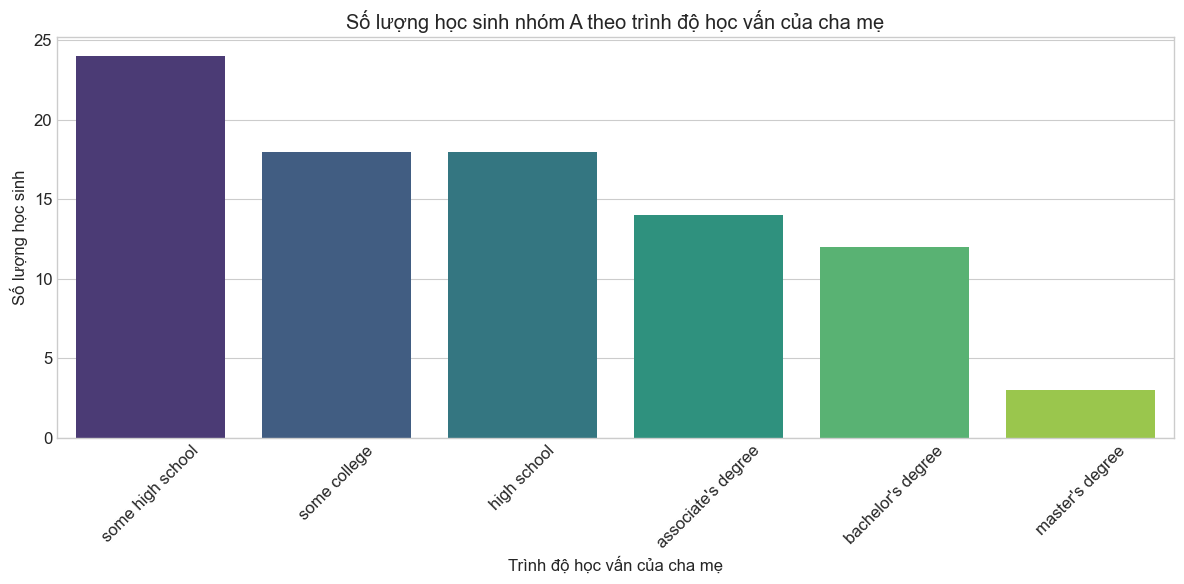

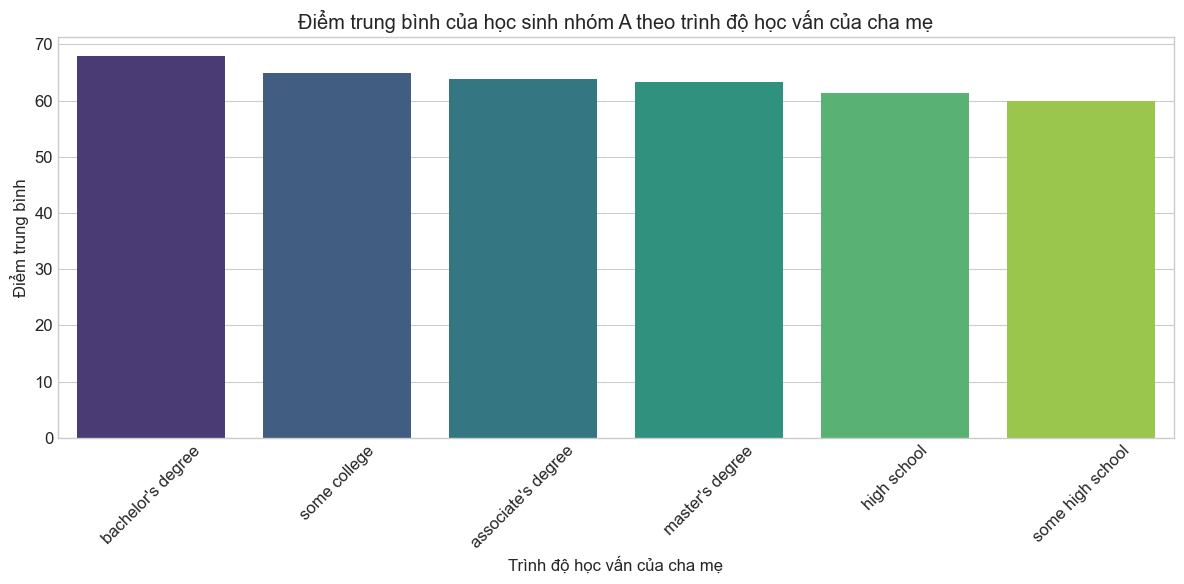

In [4]:
## Task 3: Thống kê số lượng học sinh của group A theo parental level of education
print("\n## Task 3: Thống kê số lượng học sinh của group A theo parental level of education")

# Lọc học sinh thuộc nhóm A
group_a_students = df[df['race/ethnicity'] == 'group A']

# Thống kê số lượng học sinh theo trình độ học vấn của cha mẹ
parental_education_counts = group_a_students['parental level of education'].value_counts()
display(parental_education_counts)

# Vẽ biểu đồ phân bố
plt.figure(figsize=(12, 6))
sns.barplot(x=parental_education_counts.index, y=parental_education_counts.values, palette='viridis')
plt.title('Số lượng học sinh nhóm A theo trình độ học vấn của cha mẹ')
plt.xlabel('Trình độ học vấn của cha mẹ')
plt.ylabel('Số lượng học sinh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tính điểm trung bình của học sinh nhóm A theo trình độ học vấn của cha mẹ
avg_scores_by_education = group_a_students.groupby('parental level of education')['avg_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_scores_by_education.index, y=avg_scores_by_education.values, palette='viridis')
plt.title('Điểm trung bình của học sinh nhóm A theo trình độ học vấn của cha mẹ')
plt.xlabel('Trình độ học vấn của cha mẹ')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Task 4: Mối quan hệ giữa trình độ học vấn của cha mẹ và điểm số trung bình của học sinh


parental level of education
some high school      65.108007
high school           63.096939
some college          68.476401
associate's degree    69.569069
bachelor's degree     71.923729
master's degree       73.598870
Name: avg_score, dtype: float64

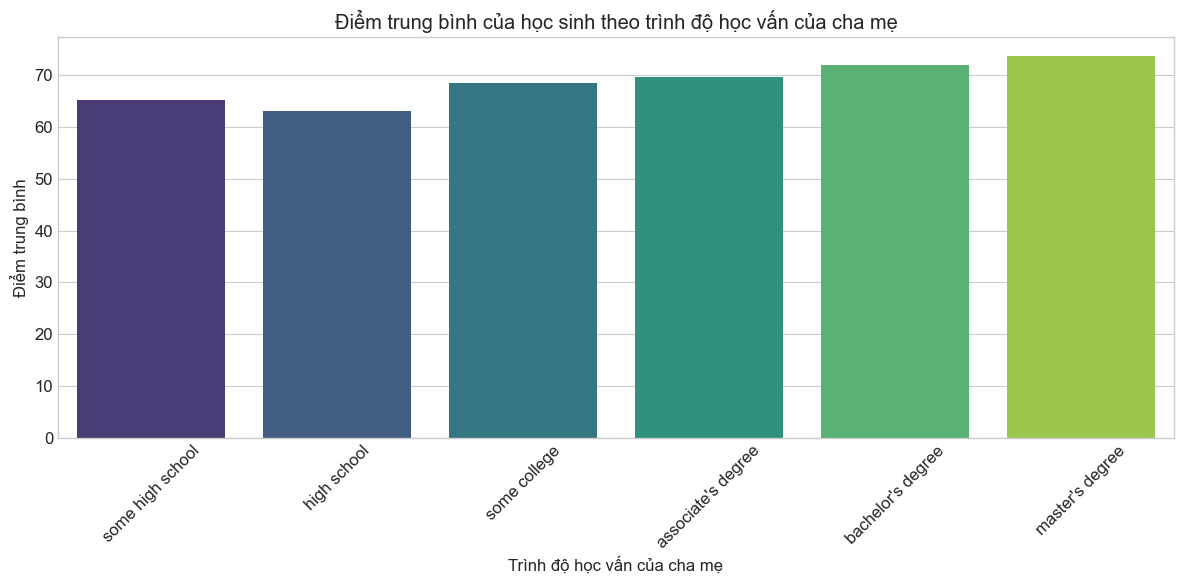

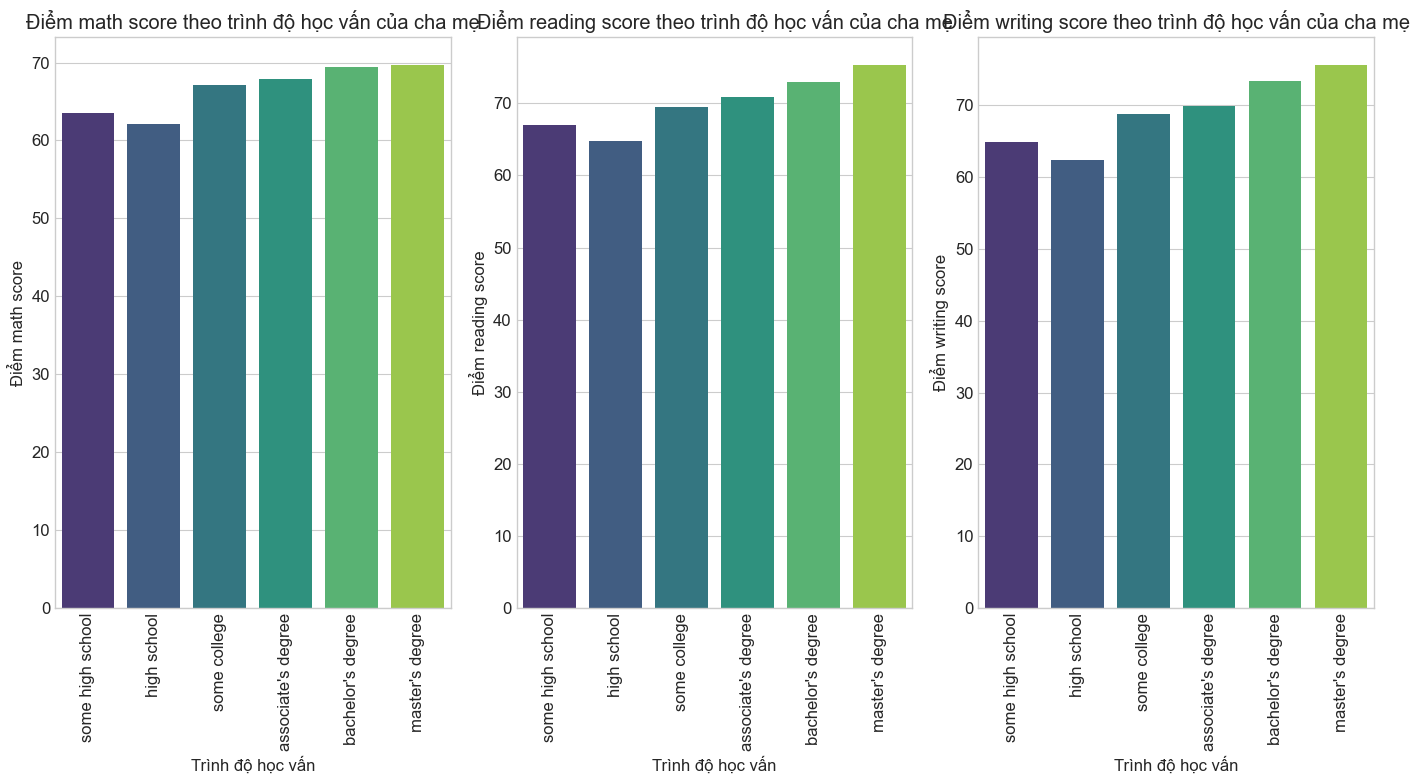


Kết quả kiểm định ANOVA: F = 10.7531, p-value = 0.000000
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm trình độ học vấn của cha mẹ.


In [5]:
## Task 4: Có phải xu hướng chung, cha mẹ có học vấn càng cao thì điểm số trung bình 3 môn của con cái cũng càng cao ko
print("\n## Task 4: Mối quan hệ giữa trình độ học vấn của cha mẹ và điểm số trung bình của học sinh")

# Thứ tự trình độ học vấn từ thấp đến cao
education_order = [
    'some high school',
    'high school',
    'some college',
    'associate\'s degree',
    'bachelor\'s degree',
    'master\'s degree'
]

# Tính điểm trung bình của học sinh theo trình độ học vấn của cha mẹ
avg_scores_by_education_all = df.groupby('parental level of education')['avg_score'].mean()

# Sắp xếp kết quả theo thứ tự trình độ học vấn
avg_scores_by_education_all = avg_scores_by_education_all.reindex(education_order)

display(avg_scores_by_education_all)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_scores_by_education_all.index, y=avg_scores_by_education_all.values, palette='viridis')
plt.title('Điểm trung bình của học sinh theo trình độ học vấn của cha mẹ')
plt.xlabel('Trình độ học vấn của cha mẹ')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kiểm tra mối quan hệ cho từng môn học riêng biệt
subjects = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(14, 8))

for i, subject in enumerate(subjects):
    avg_subject_by_education = df.groupby('parental level of education')[subject].mean().reindex(education_order)
    
    plt.subplot(1, 3, i+1)
    sns.barplot(x=avg_subject_by_education.index, y=avg_subject_by_education.values, palette='viridis')
    plt.title(f'Điểm {subject} theo trình độ học vấn của cha mẹ')
    plt.xlabel('Trình độ học vấn')
    plt.ylabel(f'Điểm {subject}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Kiểm định thống kê ANOVA để xác định ý nghĩa thống kê
from scipy import stats

# Tạo các nhóm dữ liệu theo trình độ học vấn
education_groups = [df[df['parental level of education'] == edu]['avg_score'].values for edu in education_order]

# Thực hiện kiểm định ANOVA
f_stat, p_value = stats.f_oneway(*education_groups)
print(f"\nKết quả kiểm định ANOVA: F = {f_stat:.4f}, p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm trình độ học vấn của cha mẹ.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm trình độ học vấn của cha mẹ.")




## Task 5: Mối quan hệ giữa chất lượng bữa ăn và điểm số trung bình


lunch
free/reduced    62.199061
standard        70.837209
Name: avg_score, dtype: float64

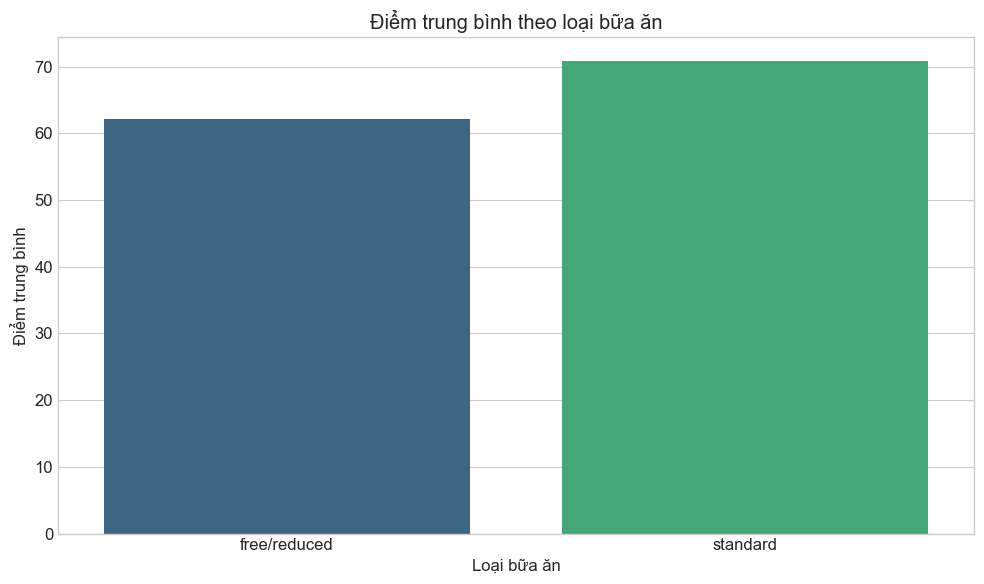

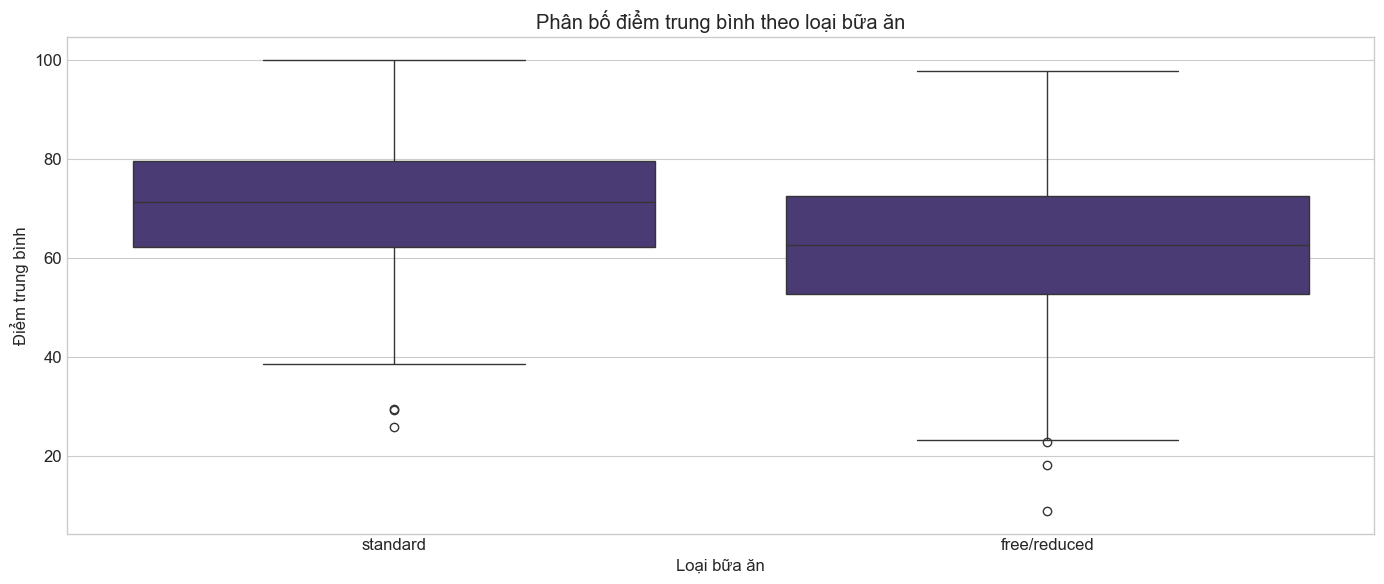


Kết quả kiểm định t-test: t = 9.3232, p-value = 0.000000
Có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm bữa ăn.


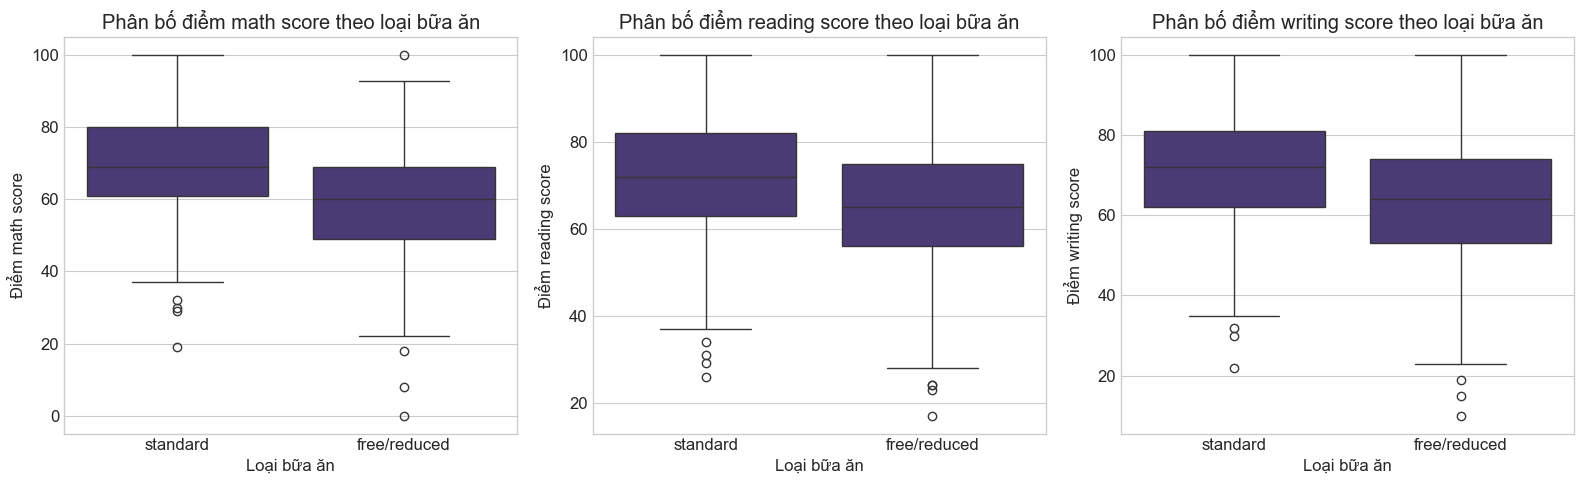

In [6]:
## Task 5: Chất lượng bữa ăn (lunch) có tương phản với điểm số trung bình 3 môn của học sinh không
print("\n## Task 5: Mối quan hệ giữa chất lượng bữa ăn và điểm số trung bình")

# Tính điểm trung bình theo loại bữa ăn
avg_scores_by_lunch = df.groupby('lunch')['avg_score'].mean()
display(avg_scores_by_lunch)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores_by_lunch.index, y=avg_scores_by_lunch.values, palette='viridis')
plt.title('Điểm trung bình theo loại bữa ăn')
plt.xlabel('Loại bữa ăn')
plt.ylabel('Điểm trung bình')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ boxplot để thấy phân bố điểm số
plt.figure(figsize=(14, 6))
sns.boxplot(x='lunch', y='avg_score', data=df)
plt.title('Phân bố điểm trung bình theo loại bữa ăn')
plt.xlabel('Loại bữa ăn')
plt.ylabel('Điểm trung bình')
plt.tight_layout()
plt.show()

# Kiểm định thống kê t-test để xác định ý nghĩa thống kê
standard_lunch = df[df['lunch'] == 'standard']['avg_score']
free_lunch = df[df['lunch'] == 'free/reduced']['avg_score']

t_stat, p_value = stats.ttest_ind(standard_lunch, free_lunch, equal_var=False)
print(f"\nKết quả kiểm định t-test: t = {t_stat:.4f}, p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm bữa ăn.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm bữa ăn.")

# Phân tích chi tiết cho từng môn học
plt.figure(figsize=(16, 5))
subjects = ['math score', 'reading score', 'writing score']

for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='lunch', y=subject, data=df)
    plt.title(f'Phân bố điểm {subject} theo loại bữa ăn')
    plt.xlabel('Loại bữa ăn')
    plt.ylabel(f'Điểm {subject}')

plt.tight_layout()
plt.show()




## Task 6: Top 10 học sinh có điểm toán cao nhất của mỗi group

Top 10 học sinh có điểm toán cao nhất của nhóm group B:


,gender,race/ethnicity,math score,avg_score
855,female,group B,97,96.666667
501,female,group B,94,91.000000
815,male,group B,94,89.000000
121,male,group B,91,90.666667
919,male,group B,91,92.666667
2,female,group B,90,92.666667
333,male,group B,90,83.000000
474,female,group B,90,90.333333
6,female,group B,88,91.666667
146,male,group B,88,82.333333


Index: [855, 501, 815, 121, 919, 2, 333, 474, 6, 146]

Top 10 học sinh có điểm toán cao nhất của nhóm group C:


,gender,race/ethnicity,math score,avg_score
104,male,group C,98,91.333333
934,male,group C,98,91.666667
864,male,group C,97,93.666667
165,female,group C,96,98.666667
562,male,group C,96,92.666667
717,female,group C,96,97.000000
612,male,group C,94,91.666667
710,male,group C,93,89.000000
594,female,group C,92,97.000000
736,male,group C,92,85.000000


Index: [104, 934, 864, 165, 562, 717, 612, 710, 594, 736]

Top 10 học sinh có điểm toán cao nhất của nhóm group A:


,gender,race/ethnicity,math score,avg_score
623,male,group A,100,94.000000
539,male,group A,97,91.666667
546,female,group A,92,96.333333
571,male,group A,91,93.000000
702,male,group A,87,86.000000
820,female,group A,85,89.000000
614,female,group A,82,89.333333
300,male,group A,81,80.000000
77,male,group A,80,79.666667
444,male,group A,79,78.000000


Index: [623, 539, 546, 571, 702, 820, 614, 300, 77, 444]

Top 10 học sinh có điểm toán cao nhất của nhóm group D:


,gender,race/ethnicity,math score,avg_score
625,male,group D,100,98.666667
712,female,group D,98,99.000000
179,female,group D,97,99.000000
618,male,group D,95,86.666667
903,female,group D,93,97.666667
957,female,group D,92,97.333333
299,male,group D,90,84.000000
659,male,group D,90,87.333333
130,male,group D,89,85.000000
439,male,group D,89,86.333333


Index: [625, 712, 179, 618, 903, 957, 299, 659, 130, 439]

Top 10 học sinh có điểm toán cao nhất của nhóm group E:


,gender,race/ethnicity,math score,avg_score
149,male,group E,100,97.666667
451,female,group E,100,96.333333
458,female,group E,100,100.000000
916,male,group E,100,100.000000
962,female,group E,100,100.000000
114,female,group E,99,99.666667
263,female,group E,99,94.000000
306,male,group E,99,89.000000
34,male,group E,97,88.666667
286,male,group E,97,89.000000


Index: [149, 451, 458, 916, 962, 114, 263, 306, 34, 286]


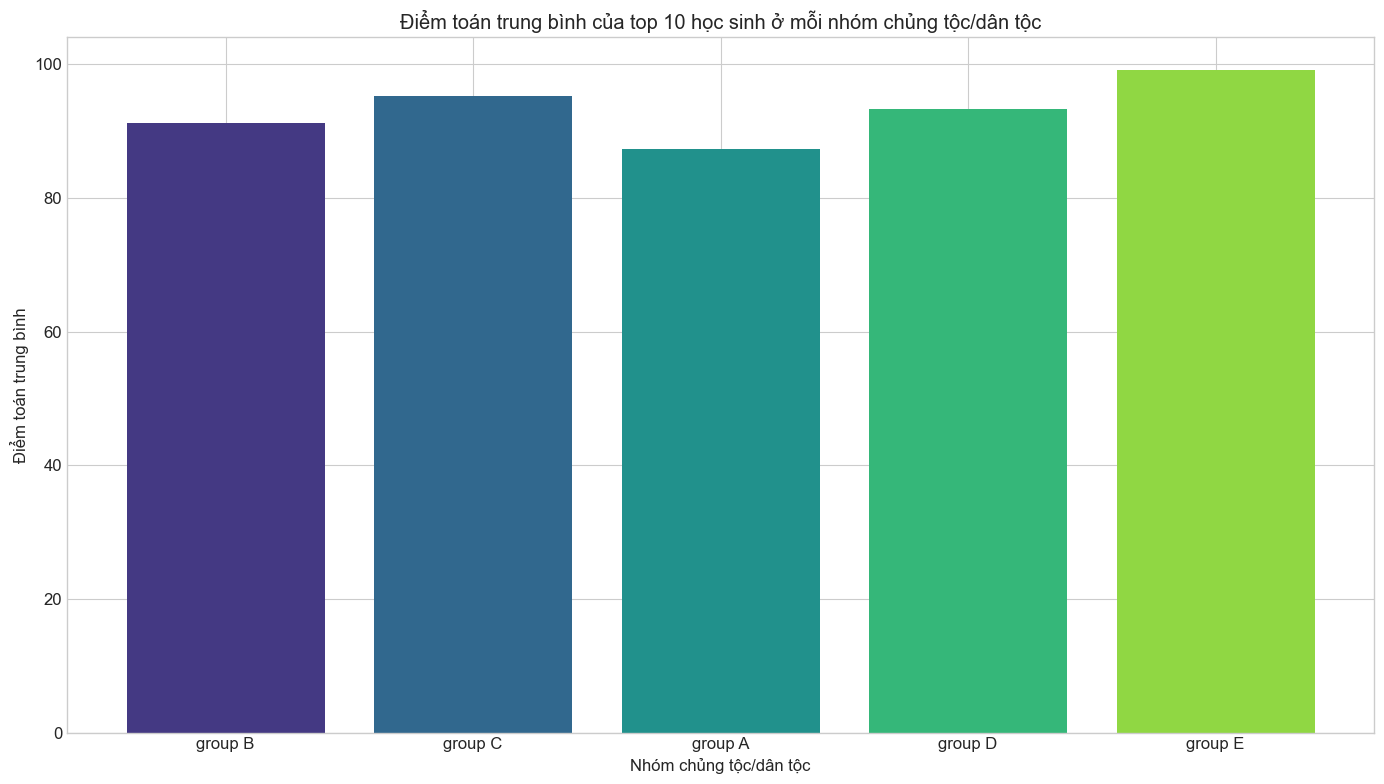

In [7]:
## Task 6: Tìm ra Top 10 học sinh có điểm toán cao nhất của mỗi group
print("\n## Task 6: Top 10 học sinh có điểm toán cao nhất của mỗi group")

# Lấy danh sách các nhóm chủng tộc/dân tộc
race_groups = df['race/ethnicity'].unique()

# Tạo dictionary để lưu kết quả
top_math_by_race = {}

# Tìm top 10 học sinh có điểm toán cao nhất của mỗi nhóm
for race in race_groups:
    race_df = df[df['race/ethnicity'] == race]
    top_10_indices = race_df.nlargest(10, 'math score').index.tolist()
    top_math_by_race[race] = top_10_indices
    
    print(f"\nTop 10 học sinh có điểm toán cao nhất của nhóm {race}:")
    display(df.loc[top_10_indices, ['gender', 'race/ethnicity', 'math score', 'avg_score']])
    print(f"Index: {top_10_indices}")

# Vẽ biểu đồ so sánh điểm toán cao nhất giữa các nhóm
plt.figure(figsize=(14, 8))
race_top_math_scores = {}

for race in race_groups:
    race_top_math_scores[race] = df.loc[top_math_by_race[race], 'math score'].mean()

races = list(race_top_math_scores.keys())
scores = list(race_top_math_scores.values())

plt.bar(races, scores, color=sns.color_palette("viridis", len(races)))
plt.title('Điểm toán trung bình của top 10 học sinh ở mỗi nhóm chủng tộc/dân tộc')
plt.xlabel('Nhóm chủng tộc/dân tộc')
plt.ylabel('Điểm toán trung bình')
plt.tight_layout()
plt.show()




## Task 7: Ảnh hưởng của việc tham gia test preparation course

Kết quả so sánh điểm trung bình giữa học sinh tham gia và không tham gia khóa chuẩn bị:


,Race/Ethnicity,Parental Education,Lunch,Completed Prep Avg,None Prep Avg,Difference,Percent Difference,Completed Count,None Count
8,group B,some high school,free/reduced,66.666667,47.066667,19.600000,41.643059,5,5
7,group B,some college,standard,78.083333,61.820513,16.262821,26.306512,8,13
28,group D,some high school,free/reduced,64.400000,51.750000,12.650000,24.444444,5,8
4,group B,high school,free/reduced,63.733333,51.575758,12.157576,23.572268,5,11
21,group D,associate's degree,free/reduced,75.380952,61.071429,14.309524,23.430799,7,14
2,group B,associate's degree,free/reduced,72.400000,58.703704,13.696296,23.331230,5,9
18,group C,some college,standard,81.976190,66.583333,15.392857,23.118183,14,32
0,group A,some college,standard,77.000000,63.111111,13.888889,22.007042,5,6
1,group A,some high school,standard,69.095238,56.833333,12.261905,21.575199,7,6
3,group B,associate's degree,standard,78.444444,66.148148,12.296296,18.589026,9,18


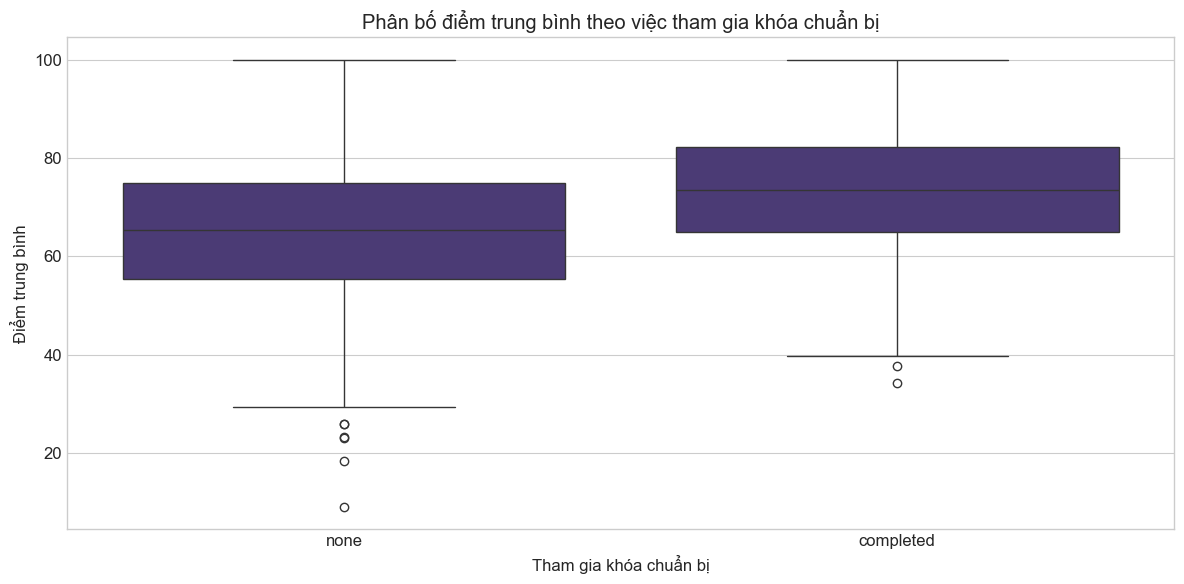

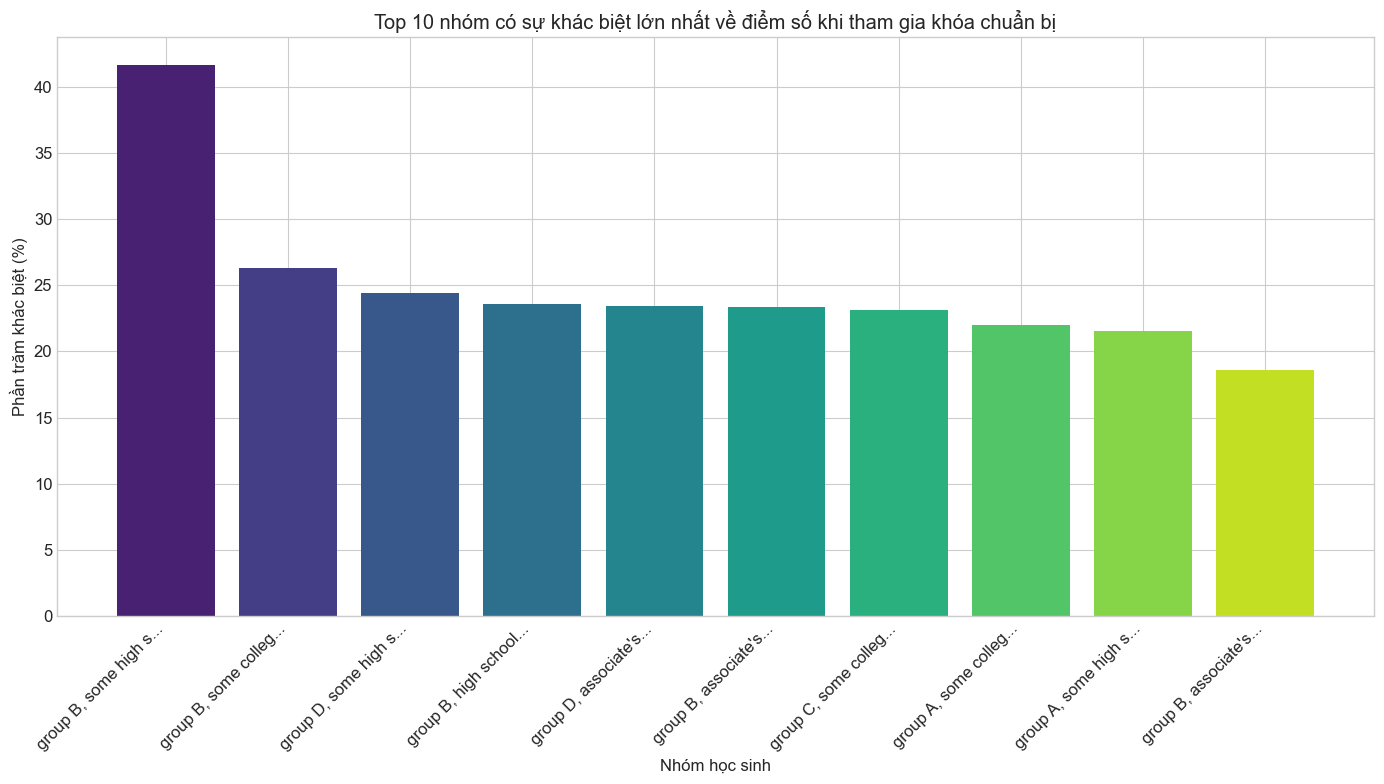


Kết quả kiểm định t-test tổng thể: t = 8.5945, p-value = 0.000000
Có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm học sinh tham gia và không tham gia khóa chuẩn bị.


In [8]:
## Task 7: Phân tích ảnh hưởng của việc tham gia test preparation course
print("\n## Task 7: Ảnh hưởng của việc tham gia test preparation course")

# Nhóm học sinh theo group, trình độ học vấn của cha mẹ, và loại bữa ăn
grouped_students = df.groupby(['race/ethnicity', 'parental level of education', 'lunch'])

# Tạo danh sách để lưu kết quả so sánh
comparison_results = []

# Phân tích từng nhóm
for name, group in grouped_students:
    race, education, lunch = name
    
    # Tách nhóm thành hai nhóm: tham gia và không tham gia khóa chuẩn bị
    completed_prep = group[group['test preparation course'] == 'completed']
    none_prep = group[group['test preparation course'] == 'none']
    
    # Bỏ qua các nhóm quá nhỏ
    if len(completed_prep) < 5 or len(none_prep) < 5:
        continue
    
    # Tính điểm trung bình của mỗi nhóm
    completed_avg = completed_prep['avg_score'].mean()
    none_avg = none_prep['avg_score'].mean()
    
    # Tính sự khác biệt
    difference = completed_avg - none_avg
    percent_diff = (difference / none_avg) * 100
    
    # Thêm kết quả vào danh sách
    comparison_results.append({
        'Race/Ethnicity': race,
        'Parental Education': education,
        'Lunch': lunch,
        'Completed Prep Avg': completed_avg,
        'None Prep Avg': none_avg,
        'Difference': difference,
        'Percent Difference': percent_diff,
        'Completed Count': len(completed_prep),
        'None Count': len(none_prep)
    })

# Chuyển danh sách kết quả thành DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Sắp xếp kết quả theo sự khác biệt phần trăm
comparison_df = comparison_df.sort_values('Percent Difference', ascending=False)

print("\nKết quả so sánh điểm trung bình giữa học sinh tham gia và không tham gia khóa chuẩn bị:")
display(comparison_df)

# Vẽ biểu đồ tổng quan
plt.figure(figsize=(12, 6))
sns.boxplot(x='test preparation course', y='avg_score', data=df)
plt.title('Phân bố điểm trung bình theo việc tham gia khóa chuẩn bị')
plt.xlabel('Tham gia khóa chuẩn bị')
plt.ylabel('Điểm trung bình')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ top 10 nhóm có sự khác biệt lớn nhất
top_diff_groups = comparison_df.head(10)
plt.figure(figsize=(14, 8))

# Tạo nhãn cho trục x
x_labels = [f"{row['Race/Ethnicity']}, {row['Parental Education']}, {row['Lunch']}" 
            for _, row in top_diff_groups.iterrows()]
shortened_labels = [label[:20] + '...' if len(label) > 20 else label for label in x_labels]

plt.bar(range(len(top_diff_groups)), top_diff_groups['Percent Difference'], color=sns.color_palette("viridis", len(top_diff_groups)))
plt.title('Top 10 nhóm có sự khác biệt lớn nhất về điểm số khi tham gia khóa chuẩn bị')
plt.xlabel('Nhóm học sinh')
plt.ylabel('Phần trăm khác biệt (%)')
plt.xticks(range(len(top_diff_groups)), shortened_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Kiểm định t-test tổng thể
completed_all = df[df['test preparation course'] == 'completed']['avg_score']
none_all = df[df['test preparation course'] == 'none']['avg_score']

t_stat, p_value = stats.ttest_ind(completed_all, none_all, equal_var=False)
print(f"\nKết quả kiểm định t-test tổng thể: t = {t_stat:.4f}, p-value = {p_value:.6f}")

if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm học sinh tham gia và không tham gia khóa chuẩn bị.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê về điểm số giữa hai nhóm học sinh.")



In [9]:
## Tổng kết và nhận xét
print("\n## Tổng kết và nhận xét")
print("1. Có mối tương quan chặt chẽ giữa điểm số ba môn học (toán, đọc, viết).")
print("2. Trình độ học vấn của cha mẹ có ảnh hưởng tích cực đến điểm số của học sinh, càng cao thì điểm trung bình càng cao.")
print("3. Loại bữa ăn (đại diện cho hoàn cảnh kinh tế) có mối tương quan với điểm số, học sinh có bữa ăn tiêu chuẩn thường có điểm cao hơn.")
print("4. Việc tham gia khóa chuẩn bị kiểm tra giúp cải thiện đáng kể điểm số ở hầu hết các nhóm học sinh.")
print("5. Có sự khác biệt về điểm số giữa các nhóm chủng tộc/dân tộc, nhưng điều này cũng có thể liên quan đến các yếu tố khác như hoàn cảnh kinh tế và giáo dục.")


## Tổng kết và nhận xét
1. Có mối tương quan chặt chẽ giữa điểm số ba môn học (toán, đọc, viết).
2. Trình độ học vấn của cha mẹ có ảnh hưởng tích cực đến điểm số của học sinh, càng cao thì điểm trung bình càng cao.
3. Loại bữa ăn (đại diện cho hoàn cảnh kinh tế) có mối tương quan với điểm số, học sinh có bữa ăn tiêu chuẩn thường có điểm cao hơn.
4. Việc tham gia khóa chuẩn bị kiểm tra giúp cải thiện đáng kể điểm số ở hầu hết các nhóm học sinh.
5. Có sự khác biệt về điểm số giữa các nhóm chủng tộc/dân tộc, nhưng điều này cũng có thể liên quan đến các yếu tố khác như hoàn cảnh kinh tế và giáo dục.
